In [1]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import glob
import numpy as np
import pandas as pd

In [2]:
pretrained_model = VGG16(weights="imagenet")

553467096/553467096 [==============================] - 4s 0us/step


In [3]:
pretrained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [4]:
imagenet_classes = pd.read_json(r'/content/drive/MyDrive/Datasets /imagenet_class_index.json')
imagenet_classes = imagenet_classes.T[[1]]
imagenet_classes.columns = ["Class"]

In [5]:
imagenet_classes.to_dict()["Class"]

{0: 'tench',
 1: 'goldfish',
 2: 'great_white_shark',
 3: 'tiger_shark',
 4: 'hammerhead',
 5: 'electric_ray',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich',
 10: 'brambling',
 11: 'goldfinch',
 12: 'house_finch',
 13: 'junco',
 14: 'indigo_bunting',
 15: 'robin',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water_ouzel',
 21: 'kite',
 22: 'bald_eagle',
 23: 'vulture',
 24: 'great_grey_owl',
 25: 'European_fire_salamander',
 26: 'common_newt',
 27: 'eft',
 28: 'spotted_salamander',
 29: 'axolotl',
 30: 'bullfrog',
 31: 'tree_frog',
 32: 'tailed_frog',
 33: 'loggerhead',
 34: 'leatherback_turtle',
 35: 'mud_turtle',
 36: 'terrapin',
 37: 'box_turtle',
 38: 'banded_gecko',
 39: 'common_iguana',
 40: 'American_chameleon',
 41: 'whiptail',
 42: 'agama',
 43: 'frilled_lizard',
 44: 'alligator_lizard',
 45: 'Gila_monster',
 46: 'green_lizard',
 47: 'African_chameleon',
 48: 'Komodo_dragon',
 49: 'African_crocodile',
 50: 'American_alligator',
 51: 'triceratops',
 

In [6]:
cats = '/content/drive/MyDrive/Datasets /Cats and dogs/Cats/*'
dogs = '/content/drive/MyDrive/Datasets /Cats and dogs/Dogs/*'

In [7]:
x = []
y = []
for image_path in glob.glob(cats):
    input_img = load_img(image_path, target_size=(224,224))
    input_img = np.array(input_img)
    input_img = preprocess_input(input_img)
    x.append(input_img)
    y.append(0) # 0-cats and 1-dogs
for image_path in glob.glob(dogs):
    input_img = load_img(image_path, target_size=(224,224))
    input_img = np.array(input_img)
    input_img = preprocess_input(input_img)
    x.append(input_img)
    y.append(1) # 0-Cars and 1-Planes

In [8]:
x = np.array(x)
y = np.array(y)

In [9]:
x.shape

(1002, 224, 224, 3)

In [10]:
model_for_cats_dogs = Sequential() # Empty model

for layer in pretrained_model.layers[:-1]:
    layer.trainable = False # Not to train/update weights in this layer
    model_for_cats_dogs.add(layer)

model_for_cats_dogs.add(Dense(1, activation = "sigmoid"))

In [11]:
model_for_cats_dogs.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [12]:
model_for_cats_dogs.compile(optimizer="adam",loss="binary_crossentropy", metrics="accuracy")

In [13]:
model_for_cats_dogs.fit(x=x, y=y, epochs=10, validation_split=0.2, shuffle=True)

Epoch 1/10
26/26 [==============================] - 20s 385ms/step - loss: 0.1520 - accuracy: 0.9351 - val_loss: 0.1239 - val_accuracy: 0.9602
Epoch 2/10
26/26 [==============================] - 5s 176ms/step - loss: 0.0252 - accuracy: 0.9950 - val_loss: 0.1552 - val_accuracy: 0.9453
Epoch 3/10
26/26 [==============================] - 4s 157ms/step - loss: 0.0114 - accuracy: 0.9975 - val_loss: 0.0914 - val_accuracy: 0.9751
Epoch 4/10
26/26 [==============================] - 4s 156ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.1140 - val_accuracy: 0.9602
Epoch 5/10
26/26 [==============================] - 4s 156ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.1215 - val_accuracy: 0.9602
Epoch 6/10
26/26 [==============================] - 4s 159ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.1058 - val_accuracy: 0.9652
Epoch 7/10
26/26 [==============================] - 4s 175ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.1238 - val_accuracy: 0.9602
Epoch

In [37]:
image_for_pred = load_img(r"/content/drive/MyDrive/Datasets /Cats and dogs/Cat image.jpg", target_size=(224,224))

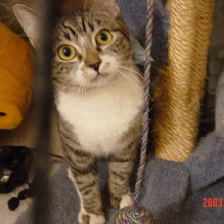

In [38]:
image_for_pred

In [39]:
image_for_pred = np.array(image_for_pred)
image_for_pred = image_for_pred.reshape(1, 224,224,3)
image_for_pred = preprocess_input(image_for_pred)

In [40]:
image_for_pred.shape

(1, 224, 224, 3)

In [41]:
preds = pretrained_model.predict(image_for_pred)

1/1 [==============================] - 0s 19ms/step


In [42]:
preds.shape

(1, 1000)

In [43]:
imagenet_classes["pred_prob"] = np.round(preds.flatten(),2)*100

In [44]:
imagenet_classes.sort_values("pred_prob", ascending=False)

,Class,pred_prob
281,tabby,24.0
285,Egyptian_cat,18.0
282,tiger_cat,17.0
457,bow_tie,3.0
287,lynx,2.0
...,...,...
341,hog,0.0
342,wild_boar,0.0
343,warthog,0.0
344,hippopotamus,0.0


In [45]:
preds = model_for_cats_dogs.predict(image_for_pred)

1/1 [==============================] - 0s 27ms/step


In [48]:
preds.shape

(1, 1)

In [52]:
np.round(preds[0]) # 0 == Cat

array([0.], dtype=float32)

*   0 - Cats
*   1 - Dogs

In [61]:
image_for_pred = load_img(r"/content/drive/MyDrive/Datasets /Cats and dogs/Dog image.jpg", target_size=(224,224))

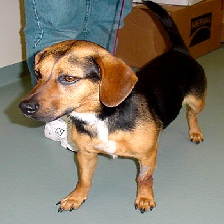

In [62]:
image_for_pred

In [63]:
image_for_pred = np.array(image_for_pred)
image_for_pred = image_for_pred.reshape(1, 224,224,3)
image_for_pred = preprocess_input(image_for_pred)

In [64]:
image_for_pred

array([[[[  62.060997,   54.221   ,   56.32    ],
         [  64.061   ,   53.221   ,   56.32    ],
         [  63.060997,   52.221   ,   55.32    ],
         ...,
         [-103.939   , -104.779   ,  -53.68    ],
         [-103.939   , -108.779   ,  -61.68    ],
         [ -95.939   ,  -97.779   ,  -52.68    ]],

        [[  63.060997,   55.221   ,   57.32    ],
         [  63.060997,   55.221   ,   57.32    ],
         [  62.060997,   54.221   ,   56.32    ],
         ...,
         [-102.939   ,  -98.779   ,  -49.68    ],
         [-103.939   , -102.779   ,  -56.68    ],
         [ -88.939   ,  -87.779   ,  -45.68    ]],

        [[  62.060997,   54.221   ,   56.32    ],
         [  62.060997,   54.221   ,   56.32    ],
         [  62.060997,   54.221   ,   56.32    ],
         ...,
         [-103.939   ,  -97.779   ,  -53.68    ],
         [-103.939   , -102.779   ,  -60.68    ],
         [ -94.939   ,  -89.779   ,  -49.68    ]],

        ...,

        [[  71.061   ,   58.221   ,   

In [65]:
image_for_pred.shape

(1, 224, 224, 3)

In [66]:
preds = model_for_cats_dogs.predict(image_for_pred)

1/1 [==============================] - 0s 27ms/step


In [67]:
np.round(preds[0]) # 1 == dog

array([1.], dtype=float32)